# Reviews Scraper
Amazon product pages, saves them, and shows basic visualizations.

In [1]:
!pip install requests beautifulsoup4 pandas matplotlib wordcloud --quiet

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import time

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/140.0.0.0 Safari/537.36'
}

def scrape_amazon_reviews(asin, pages=2):
    all_reviews = []
    for page in range(1, pages+1):
        url = f'https://www.amazon.com/product-reviews/{asin}/?pageNumber={page}'
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.content, 'html.parser')
        reviews = soup.find_all('span', {'data-hook': 'review-body'})
        all_reviews.extend([r.get_text(strip=True) for r in reviews])
        time.sleep(1)
    return pd.DataFrame({'review': all_reviews})


asin = 'B08N5WRWNW'
df = scrape_amazon_reviews(asin, pages=3)
df.to_csv('amazon_reviews.csv', index=False)
df.head()

,review


## Review Length Distribution

Text(0.5, 1.0, 'Distribution of Review Lengths')

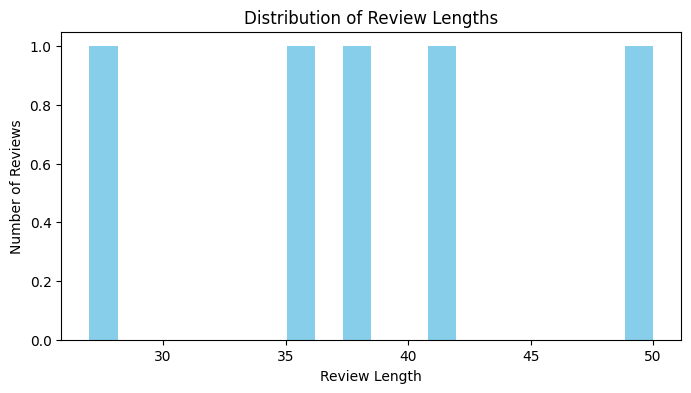

In [7]:
df['review_length'] = df['review'].apply(len)
plt.figure(figsize=(8,4))
plt.hist(df['review_length'], bins=20, color='skyblue')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Review Lengths')
#plt.show()

## Word Cloud of Reviews

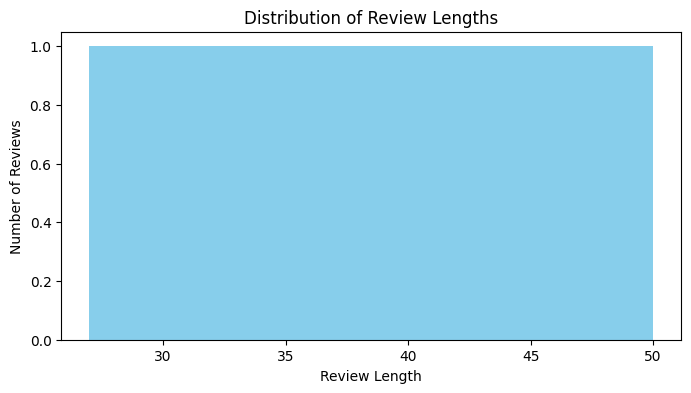

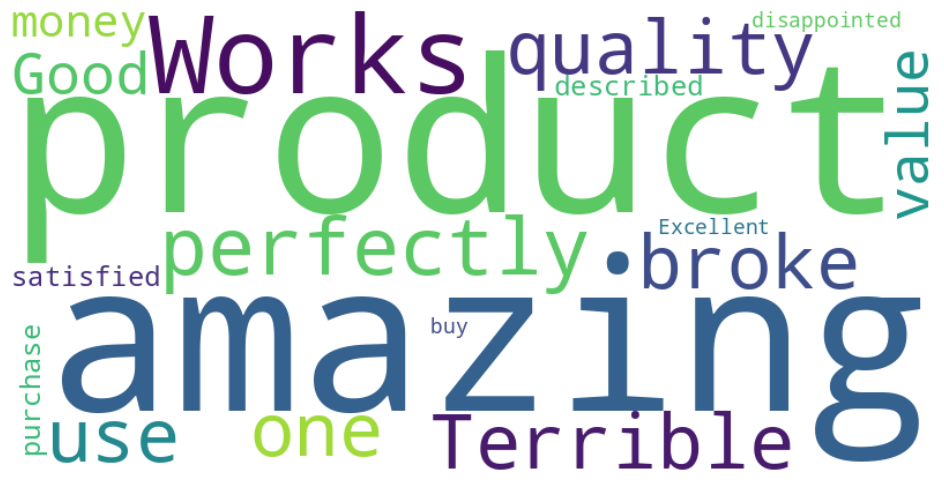

In [5]:

reviews = [
    "This product is amazing! Works perfectly.",
    "Terrible quality, broke after one use.",
    "Excellent, would buy again!"
]

df = pd.DataFrame({'review': reviews})


df['review_length'] = df['review'].apply(len)
plt.figure(figsize=(8,4))
plt.hist(df['review_length'], bins=5, color='skyblue')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Review Lengths')
plt.show()

# Word Cloud
all_text = ' '.join(df['review'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [6]:
from google.colab import files
files.download('amazon_reviews.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>